In [1]:
# Import the packages we will need
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

### All material needed for this notebook can be found in the public GitHub repository [https://github.com/dchoyle/datascience_notes](https://github.com/dchoyle/datascience_notes)

## Example 1 - Bland and Altman's original data

In this example we'll use the original data from the [Bland and Altman 1986 Lancet paper](https://www-users.york.ac.uk/~mb55/meas/ba.pdf). I've saved the data in a csv file in the Data holder of the GitHib repo for you. The csv file is called BlandAltman_Example1.csv . Let's read it into a pandas dataframe

In [2]:
# Read in the raw data 
df_example1 = pd.read_csv('./Data/BlandAltman_Example1.csv')

Next we'll take a quick look at a few rows of the data.

In [3]:
# Look at the data
df_example1.head()

,Subject,Wright_PEFR_1,Wright_PEFR_2,MiniWright_PEFR_1,MiniWright_PEFR_2
0,1,494,490,512,525
1,2,395,397,430,415
2,3,516,512,520,508
3,4,434,401,428,444
4,5,476,470,500,500


In the data we can see that there are five columns; a subject identifier column and four measurement columns. The measurements are of peak expiratory flow rate, measured in litres-per-minute. Peak expiratory flow rate (PEFR) is a measure of lung strength. It is a measure of how hard you can puff. For each subject the PEFR has been measured using two different devices - a Wright Peak Flow Rate machine and a mini-Wright Peak Flow Rate monitor. The two different devices should give the same PEFR reading on each subject, up to measurement error. So, following Bland and Altman we'll compare the Wright_PEFR_1 measurements with the MiniWright_PEFR_1 measurements. Let's see what that comparison looks like in a standard scatter plot.

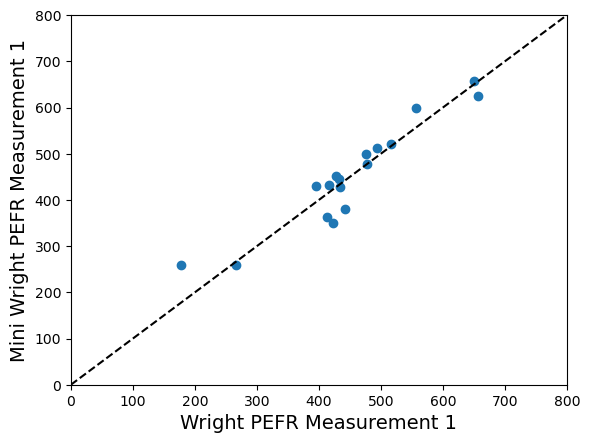

In [4]:
# Scatter plot of the 1st Peak Flow Rate measurements for each subject.
plt.scatter(df_example1['Wright_PEFR_1'], df_example1['MiniWright_PEFR_1'])
ax = plt.gca()
ax.set_xlim([0, 800])
ax.set_ylim([0, 800])
ax.axline([0, 0], [800, 800], color='black', linestyle='--')
plt.xlabel("Wright PEFR Measurement 1", fontsize=14)
plt.ylabel("Mini Wright PEFR Measurement 1", fontsize=14)
plt.show()

The Wright and mini-Wright measurements look close to each other but from the scatterplot it is difficult to assess, i) the degree of disagreement between the two measurements and, ii) whether there is any systematic pattern in the disagreement as the level of PEFR changes. To make the assessment easier we'll make a Bland-Altman plot. First, we'll have to construct the rotated features, M and A. Then we can plot them.

In [5]:
# Construct the M and A features
df_example1['A'] = 0.5*(df_example1['Wright_PEFR_1'] + df_example1['MiniWright_PEFR_1'])
df_example1['M'] = df_example1['Wright_PEFR_1'] - df_example1['MiniWright_PEFR_1']

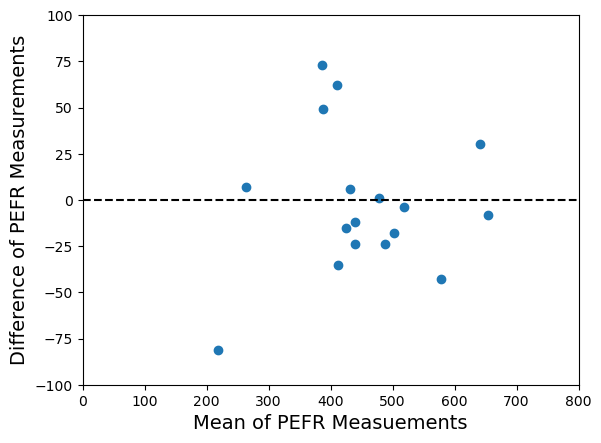

In [6]:
# Make the Bland-Altman plot
plt.scatter(df_example1['A'], df_example1['M'])
plt.axhline(y=0.0, color='black', linestyle='--')
ax = plt.gca()
ax.set_xlim([0, 800])
ax.set_ylim([-100, 100])
plt.xlabel("Mean of PEFR Measuements", fontsize=14)
plt.ylabel("Difference of PEFR Measurements", fontsize=14)
plt.show()

We can see fro the plot there is a sizeable range of disgareement between the two measurements, even up to nearly 100 litres-per-minute. Given the typical PEFR is around 400-500 litre-per-minute, that can be a significant discrepancy. However, there appears to be no systematic pattern in the discrpeancy as we move along the x-axis.

## Bland Altman Example 2

In this second example I'm going to illustrate how a Bland-Altman plot can be used to reveal a systematic bias between two paired samples that isn't immediately obvious from the initial scatter plot. The data for this example is also in the Data folder of the GitHub repository and is in a file called BlandAltman_Example2.csv. So let's read in that data

In [7]:
# Read in the data into a pandas dataframe
df_example2 = pd.read_csv('./Data/BlandAltman_Example2.csv')

Now let's take a quick look at the data

In [8]:
# Look at the data
df_example2.head()

,x1,x2
0,-7.609873,9.609873
1,2.731012,1.268988
2,15.299017,-9.299017
3,-0.034370,8.034370
4,-0.590683,10.590683


We can see there are two columns in the dataset, corresponding to variables x1 and x2. Our initial scatterplot will plot x2 against x1.

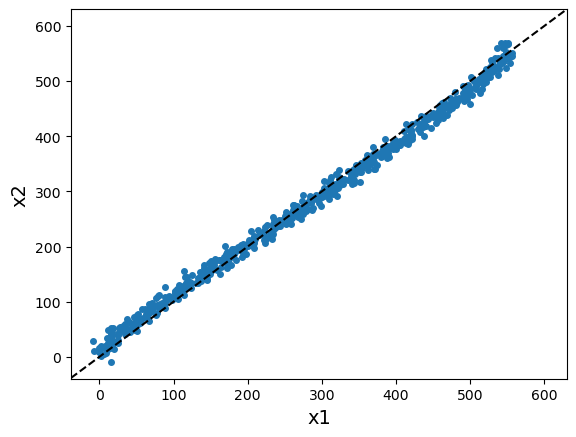

In [9]:
# Construct scatterplot of x1 and x2
plt.scatter(df_example2['x1'], df_example2['x2'], s=16)
ax = plt.gca()
ax.axline([0, 0], [600, 600], color='black', linestyle='--')
plt.xlabel("x1", fontsize=14)
plt.ylabel("x2", fontsize=14)
plt.show()

Looking at the data relative to the 45-degree line (black dashed line) the scatterplot suggests good agreement between the two samples - maybe a bit of disagreement but not much. However, let's look at the same data as a Bland-Altman plot. We'll need to construct the M and A features first, and then plot them. 

In [10]:
# Create the new M and A features
a = 0.5*(df_example2['x1'] + df_example2['x2'])
m = (df_example2['x1'] - df_example2['x2'])

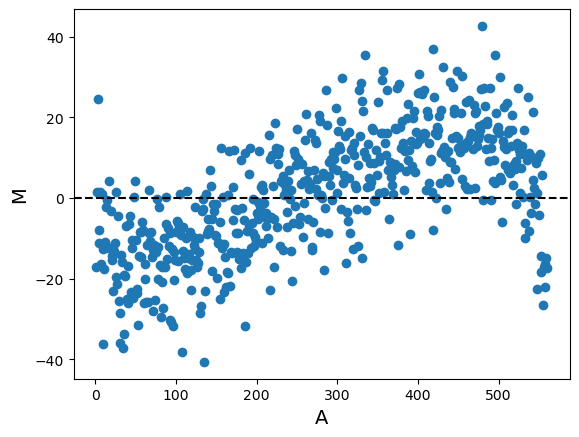

In [11]:
# Now plot the new features
plt.scatter(a, m)
plt.axhline(y=0.0, color='black', linestyle='--')
plt.xlabel("A", fontsize=14)
plt.ylabel("M", fontsize=14)
plt.show()

We can see a clear systematic pattern to the discrepancy between the samples as we change the value of A (the average of the each pair of measurements). There is a clear non-linear bias between the two sets of measurements. 

We can estimate that bias by simply fitting a non-linear curve through that data cloud. We'll do that using the [lowess](https://www.jstor.org/stable/2286407?origin=JSTOR-pdf) non-parametric curve fitting method. I'm going to use the [lowess implementation](https://www.statsmodels.org/dev/generated/statsmodels.nonparametric.smoothers_lowess.lowess.html) available in the statsmmodels package. It is very simple to use.

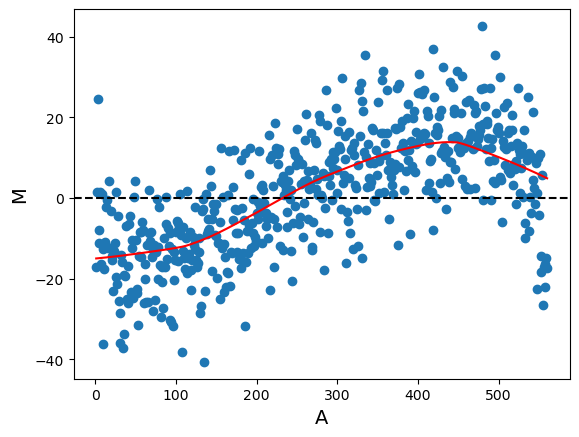

In [12]:
# Now let's add the non-linear trend line to the plot
lowess = sm.nonparametric.lowess
z = lowess(m, a, frac=0.4)

plt.scatter(a, m)
plt.plot(a, z[:, 1], 'red')
plt.axhline(y=0.0, color='black', linestyle='--')
plt.xlabel("A", fontsize=14)
plt.ylabel("M", fontsize=14)
plt.show()

The red lowess trendline shows the systematic variation of M as we vary A. In an ideal world there would be no systematic variation and the data cloud would lie centered about the horizontal dashed line at M=0. This also tells us how to correct for the bias. We simply subtract off our estimate of the systematic trend from the values of M. Once we've done that we can replot the scatterplot to confirm visually that the bias has been removed. We do this in the plot below. 

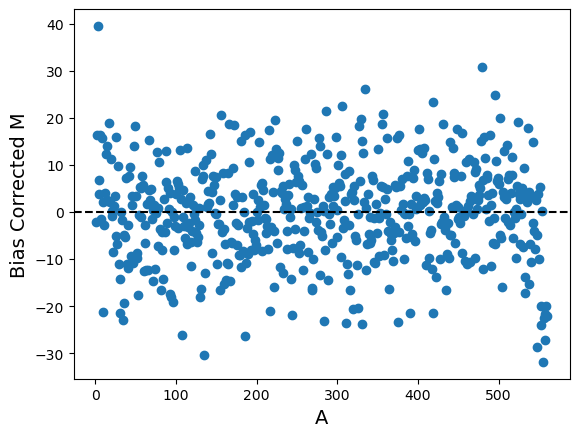

In [13]:
# Now let's correct for the bias represented by the trend line
plt.scatter(a, m - z[:, 1])
plt.axhline(y=0.0, color='black', linestyle='--')
plt.xlabel("A", fontsize=14)
plt.ylabel("Bias Corrected M", fontsize=14)
plt.show()